In [80]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [53]:
weekly_nfl = nfl.import_weekly_data(years=[2024])

Downcasting floats.


In [54]:
weekly_nfl.sort_values(by=['fantasy_points_ppr'], ascending=False)

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,passing_2pt_conversions,pacr,dakota,carries,rushing_yards,rushing_tds,rushing_fumbles,rushing_fumbles_lost,rushing_first_downs,rushing_epa,rushing_2pt_conversions,receptions,targets,receiving_yards,receiving_tds,receiving_fumbles,receiving_fumbles_lost,receiving_air_yards,receiving_yards_after_catch,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
623,00-0036259,J.Jennings,Jauan Jennings,WR,WR,https://static.w...,SF,2024,3,REG,LA,0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN,0,NaN,NaN,0,0.0,0,0.0,0.0,0.0,NaN,0,11,12,175.0,3,0.0,0.0,149.0,26.0,7.0,15.495835,0,1.174497,0.400000,0.454268,0.917988,0.0,35.500000,46.500000
281,00-0033906,A.Kamara,Alvin Kamara,RB,RB,https://static.w...,NO,2024,2,REG,DAL,0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN,0,NaN,NaN,20,115.0,3,0.0,0.0,8.0,8.755781,0,2,3,65.0,1,0.0,0.0,-4.0,68.0,1.0,5.370997,0,-16.250000,0.200000,-0.028986,0.279710,0.0,42.000000,44.000000
792,00-0036900,J.Chase,Ja'Marr Chase,WR,WR,https://static.w...,CIN,2024,5,REG,BAL,0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN,0,NaN,NaN,0,0.0,0,0.0,0.0,0.0,NaN,0,10,12,193.0,2,0.0,0.0,109.0,97.0,8.0,12.568954,0,1.770642,0.307692,0.338509,0.698495,0.0,31.299999,41.299999
135,00-0032764,D.Henry,Derrick Henry,RB,RB,https://static.w...,BAL,2024,4,REG,BUF,0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN,0,NaN,NaN,24,199.0,1,1.0,0.0,8.0,8.636214,0,3,3,10.0,1,0.0,0.0,1.0,9.0,1.0,-0.306955,0,10.000000,0.166667,0.007812,0.255469,0.0,32.900002,35.900002
23,00-0029604,K.Cousins,Kirk Cousins,QB,QB,https://static.w...,ATL,2024,5,REG,TB,42,58,509.0,4,1.0,4.0,32.0,0,0,424.0,238.0,24.0,21.914051,0,1.200472,0.208823,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,34.360001,34.360001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,00-0038416,T.Bagent,Tyson Bagent,QB,QB,https://static.w...,CHI,2024,5,REG,CAR,0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN,0,NaN,NaN,3,-4.0,0,0.0,0.0,0.0,0.000000,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,-0.400000,-0.400000
1061,00-0038129,C.Otton,Cade Otton,TE,TE,https://static.w...,TB,2024,2,REG,DET,0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN,0,NaN,NaN,1,-4.0,0,0.0,0.0,0.0,-1.315810,0,0,2,0.0,0,0.0,0.0,0.0,0.0,0.0,-1.633467,0,NaN,0.105263,0.000000,0.157895,0.0,-0.400000,-0.400000
1300,00-0039152,W.Levis,Will Levis,QB,QB,https://static.w...,TEN,2024,4,REG,MIA,3,4,25.0,0,1.0,0.0,-0.0,0,0,18.0,13.0,0.0,-3.084777,0,1.388889,NaN,2,5.0,0,0.0,0.0,1.0,-0.562447,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,-0.500000,-0.500000
823,00-0036972,M.Jones,Mac Jones,QB,QB,https://static.w...,JAX,2024,3,REG,BUF,5,8,22.0,0,0.0,1.0,17.0,1,1,13.0,25.0,1.0,-10.052735,0,1.692308,-0.024125,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,-1.120000,-1.120000


In [51]:
print(weekly_nfl.columns)

Index(['player_id', 'player_name', 'player_display_name', 'position', 'position_group', 'headshot_url', 'recent_team', 'season', 'week', 'season_type', 'opponent_team', 'completions', 'attempts', 'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch', 'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards', 'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards', 'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share', 'wopr', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr'], dtype='object')


In [177]:
# Filter the data for Wide Receivers (WR)

wr_data = weekly_nfl[weekly_nfl['position'] == 'WR']

# Sort the data by 'fantasy_points_ppr' in descending order

sorted_wr_data = wr_data.sort_values(by='fantasy_points_ppr', ascending=False)

# Display the first few rows of the sorted data

#print(sorted_wr_data.head())
# Select specific columns to display

columns_to_display = ['player_id', 'player_name', 'player_display_name', 'recent_team' , 'week', 'opponent_team', 'fantasy_points_ppr' , 'target_share' ,'targets', 'receptions', 'receiving_yards', 'receiving_epa', 'rushing_yards']

# Display the sorted data with selected columns
print(sorted_wr_data[columns_to_display].head(50))

# Optionally, adjust pandas display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set display width
pd.set_option('display.max_colwidth', 20)   # Set max column width

       player_id     player_name player_display_name recent_team  week opponent_team  fantasy_points_ppr  target_share  targets  receptions  receiving_yards  receiving_epa  rushing_yards
635   00-0036259      J.Jennings      Jauan Jennings          SF     3            LA           46.500000      0.400000       12          11            175.0      15.495835            0.0
805   00-0036900         J.Chase       Ja'Marr Chase         CIN     5           BAL           41.299999      0.307692       12          10            193.0      12.568954            0.0
886   00-0037238        D.London        Drake London         ATL     5            TB           33.400002      0.240741       13          12            154.0      12.692541            0.0
1305  00-0039146          J.Reed         Jayden Reed          GB     1           PHI           33.099998      0.187500        6           4            138.0       8.749667           33.0
739   00-0036554       N.Collins        Nico Collins         HOU 

In [204]:
# Import weekly data for the 2024 season
weekly_nfl = nfl.import_weekly_data(years=[2024])


# Filter the data for Wide Receivers (WR) and week 4
wr_week5_data = weekly_nfl[(weekly_nfl['position'] == 'RB') & (weekly_nfl['week'] <= 16) & (weekly_nfl['opponent_team'] == 'BUF')]


# Sort the data by 'fantasy_points_ppr' in descending order
sorted_wr_week5_data = wr_week5_data.sort_values(by='fantasy_points_ppr', ascending=False)


# Optionally, adjust pandas display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set display width
pd.set_option('display.max_colwidth', 20)   # Set max column width


# Select specific columns to display
columns_to_display = [
    'player_id', 'player_name', 'recent_team', 'week', 'opponent_team',
    'fantasy_points_ppr', 'target_share', 'targets', 'receptions',
    'receiving_yards', 'receiving_epa', 'rushing_yards'
]

# Display the sorted data with selected columns
#print(sorted_wr_week5_data[columns_to_display].head(50))



# Create DataFrame
df = pd.DataFrame(sorted_wr_week5_data[columns_to_display].head(50))
print(df)

Downcasting floats.
       player_id   player_name recent_team  week opponent_team  fantasy_points_ppr  target_share  targets  receptions  receiving_yards  receiving_epa  rushing_yards
137   00-0032764       D.Henry         BAL     4           BUF           35.900002      0.166667        3           3             10.0      -0.306955          199.0
1261  00-0039040      D.Achane         MIA     2           BUF           29.500000      0.189189        7           7             69.0       6.636870           96.0
459   00-0034975        J.Hill         BAL     4           BUF           21.600000      0.333333        6           6             78.0       9.349309           18.0
230   00-0033553      J.Conner         ARI     1           BUF           19.299999      0.129032        4           3             33.0       1.648868           50.0
259   00-0033854  D.Ogunbowale         HOU     5           BUF           14.700000      0.200000        7           6             57.0       4.297158      

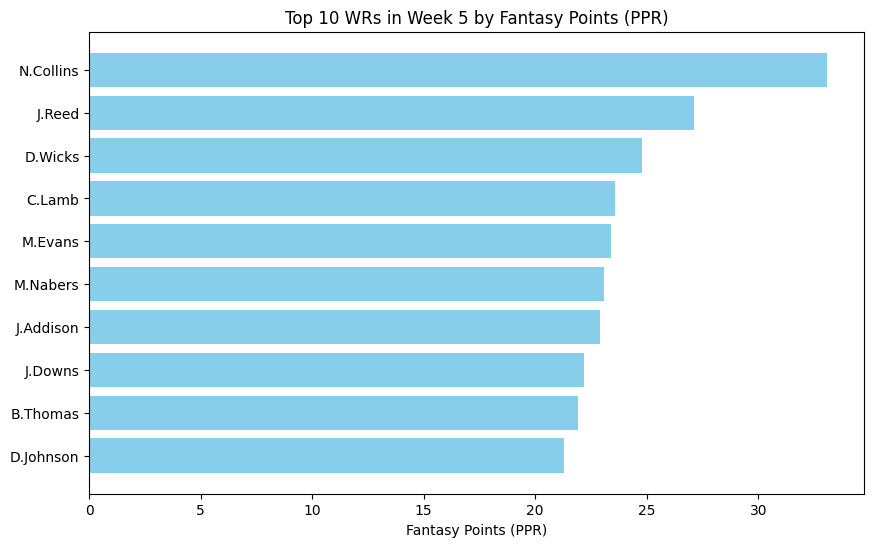

In [83]:
# Get the top 10 wide receivers based on 'fantasy_points_ppr'

top_10_wr_week5 = sorted_wr_week5_data.head(10)


# Plotting

plt.figure(figsize=(10, 6))

plt.barh(top_10_wr_week5['player_name'], top_10_wr_week5['fantasy_points_ppr'], color='skyblue')

plt.xlabel('Fantasy Points (PPR)')

plt.title('Top 10 WRs in Week 5 by Fantasy Points (PPR)')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top

plt.show()

In [94]:
# Initialize variables to store the best feature and the highest R^2 value
best_predictor = None
best_r_squared = -1


# Columns to exclude from predictors
columns_to_exclude = ['player_id', 'player_name', 'recent_team', 'fantasy_points_ppr', 'opponent_team']


# Iterate over each feature to find the best predictor, excluding specified columns
for feature in df.columns.drop(columns_to_exclude):
    formula = f'fantasy_points_ppr ~ {feature}'
    model = smf.ols(formula=formula, data=df).fit()
    r2 = model.rsquared

    # Update the best feature and R^2 value if the current one is better
    if r2 > best_r_squared:
        best_r_squared = r2
        best_predictor = feature


# Output the best feature and the resulting R^2 value
print(f"Best predictor: {best_predictor}")
print(f"R-squared value: {best_r_squared}")

Best predictor: receiving_yards
R-squared value: 0.4336387901716908


In [104]:
snaps = nfl.import_snap_counts(years=[2024])
print(snaps.columns)

Index(['game_id', 'pfr_game_id', 'season', 'game_type', 'week', 'player', 'pfr_player_id', 'position', 'team', 'opponent', 'offense_snaps', 'offense_pct', 'defense_snaps', 'defense_pct', 'st_snaps', 'st_pct'], dtype='object')


In [183]:
# Import weekly data for the 2024 season
weekly_nfl = nfl.import_weekly_data(years=[2024])

# Filter the data for Wide Receivers (WR)
wr_data = weekly_nfl[weekly_nfl['position'] == 'WR']

# Sort the data by 'fantasy_points_ppr' in descending order
sorted_wr_data = wr_data.sort_values(by='fantasy_points_ppr', ascending=False)

# Select specific columns to display
columns_to_display = [
    'player_id', 'player_display_name', 'recent_team', 'week', 'opponent_team',
    'fantasy_points_ppr', 'target_share', 'targets', 'receptions',
    'receiving_yards', 'receiving_epa', 'rushing_yards'
]

# Create DataFrame with selected columns
df = pd.DataFrame(sorted_wr_data[columns_to_display])

# Import snap counts for the 2024 season
snap_counts_df = nfl.import_snap_counts(years=[2024])

# Ensure data types match
df['player_display_name'] = df['player_display_name'].astype(str)
snap_counts_df['player'] = snap_counts_df['player'].astype(str)

# Print a few rows to check for matching keys
#print(df[['player_display_name', 'week']].head())
#print(snap_counts_df[['player', 'week', 'offense_snaps']].head())

# Merge the snap counts with your existing DataFrame using the correct column names
df = df.merge(snap_counts_df[['player', 'week', 'offense_snaps']], 
              left_on=['player_display_name', 'week'], 
              right_on=['player', 'week'], 
              how='left')

# Drop the extra 'player' column after merge
df = df.drop(columns=['player'])

# Display the updated DataFrame with the first 50 rows
print(df.head(50))

# Optionally, adjust pandas display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set display width
pd.set_option('display.max_colwidth', 20)   # Set max column width

Downcasting floats.
     player_id player_display_name recent_team  week opponent_team  fantasy_points_ppr  target_share  targets  receptions  receiving_yards  receiving_epa  rushing_yards  offense_snaps
0   00-0036259      Jauan Jennings          SF     3            LA           46.500000      0.400000       12          11            175.0      15.495835            0.0           60.0
1   00-0036900       Ja'Marr Chase         CIN     5           BAL           41.299999      0.307692       12          10            193.0      12.568954            0.0           59.0
2   00-0037238        Drake London         ATL     5            TB           33.400002      0.240741       13          12            154.0      12.692541            0.0           73.0
3   00-0039146         Jayden Reed          GB     1           PHI           33.099998      0.187500        6           4            138.0       8.749667           33.0           48.0
4   00-0036554        Nico Collins         HOU     4        

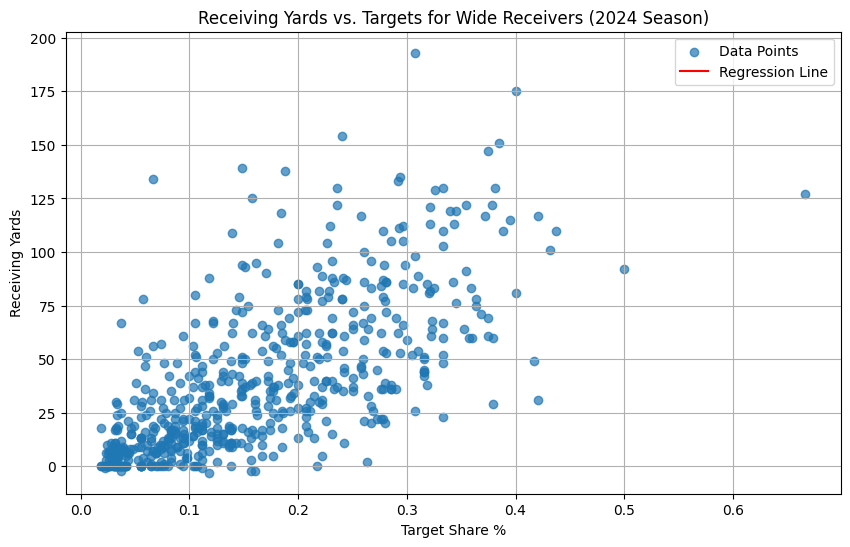

In [182]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure you have the necessary columns in your DataFrame
if 'targets' in df.columns and 'receiving_yards' in df.columns:
    # Extract the x and y data
    x = df['target_share']
    y = df['receiving_yards']

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, label='Data Points')

    # Plot the regression line
    plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel('Target Share %')
    plt.ylabel('Receiving Yards')
    plt.title('Receiving Yards vs. Targets for Wide Receivers (2024 Season)')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
else:
    print("The required columns 'targets' and 'receiving_yards' are not in the DataFrame.")

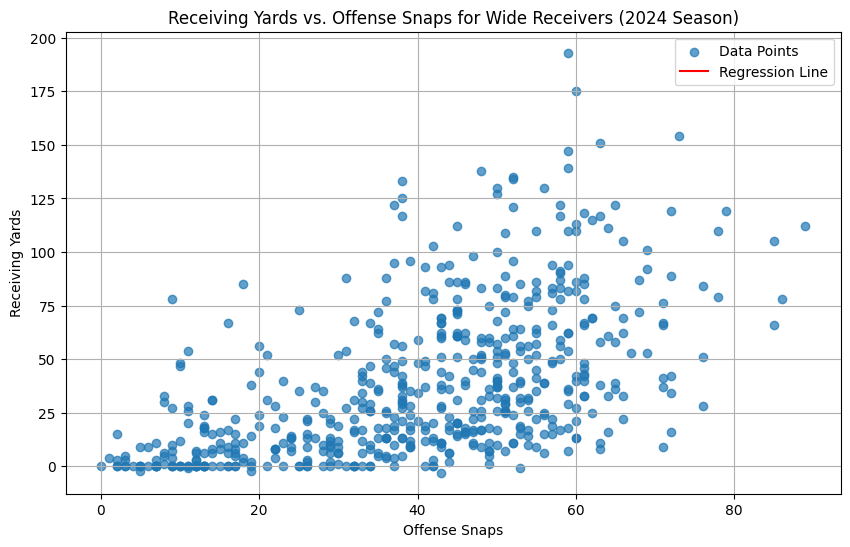

In [190]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure you have the necessary columns in your DataFrame
if 'targets' in df.columns and 'offense_snaps' in df.columns:
    # Extract the x and y data
    x = df['offense_snaps']
    y = df['receiving_yards']

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, label='Data Points')

    # Plot the regression line
    plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel('Offense Snaps')
    plt.ylabel('Receiving Yards')
    plt.title('Receiving Yards vs. Offense Snaps for Wide Receivers (2024 Season)')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
else:
    print("The required columns 'targets' and 'offense_snaps' are not in the DataFrame.")